# Preparation

In [ ]:
# load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

from IPython.display import HTML

In [ ]:
# load dataset
wine = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=";")
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:

display(wine.info())

display(wine.isna().any())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


None

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

## Inspection and Feature Engineering

**Task:** What is the range of entries in the *quality* column?

In [ ]:
quality_sorted = np.sort(wine["quality"].unique())
print("Range:", quality_sorted[0], "-", quality_sorted[-1])

Range: 3 - 9


**Task:** Let's discretize those values into three categories
- *low* (3, 4, 5),
- *medium* ( 6, 7) and
- *high* (8, 9).

Store these values in a new column in the wine dataframe.

In [ ]:
wine["quality_enc"] = wine["quality"]

quality_mapping = {3 : "low", 4: "low", 5: "low", 6: "medium", 7: "medium", 8: "high", 9: "high"}

wine.replace({"quality_enc": quality_mapping}, inplace = True)

In [ ]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_enc
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,medium
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,medium
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,medium
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,medium
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,medium


Task: Data Inspection/Exploration. Plot some correlations and graphs and look at the class distributions

Text(0.5, 1.0, 'Verteilung Quality')

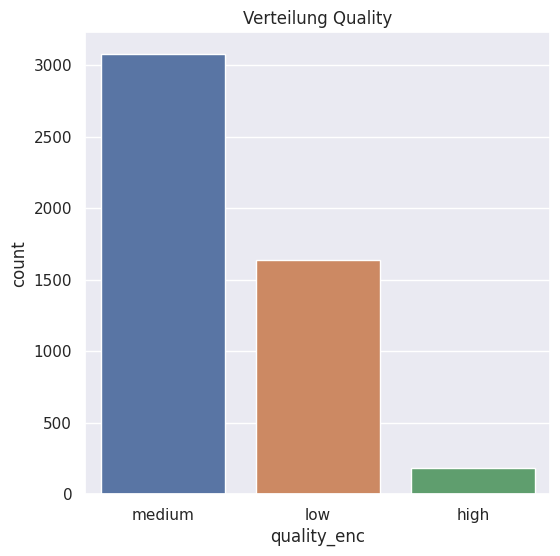

In [ ]:
#class distributions

sns.set(rc = {'figure.figsize':(6,6)})
sns.countplot(data = wine, x='quality_enc')
plt.title ("Verteilung Quality")

In [ ]:
wine.shape

(4898, 13)

In [ ]:
#features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
#       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
#       'pH', 'sulphates', 'alcohol']

features = list(wine.columns)
features.remove("quality")
features.remove("quality_enc")

X = wine[features]
y = wine["quality_enc"]

In [ ]:
# Train Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify = y, train_size = 0.85)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [ ]:
le.classes_

array(['high', 'low', 'medium'], dtype=object)

In [ ]:
# Scaling Data

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler_std = StandardScaler()
X_train_scaled_std = scaler_std.fit_transform(X_train)
X_test_scaled_std = scaler_std.transform(X_test)

## The first Models

In [ ]:
# logistic regression
modelLR = LogisticRegression()
modelLR.fit(X_train_scaled_std, y_train)


LogisticRegression()

In [ ]:
y_pred_prob = modelLR.predict_proba(X_test_scaled_std)
y_pred_prob

array([[0.00214583, 0.7110311 , 0.28682306],
       [0.03426127, 0.15618816, 0.80955057],
       [0.09502338, 0.07943699, 0.82553963],
       ...,
       [0.00111792, 0.82832216, 0.17055992],
       [0.01627489, 0.42208722, 0.56163789],
       [0.0198376 , 0.27331001, 0.7068524 ]])

In [ ]:
pd.DataFrame(y_pred_prob).style.background_gradient(cmap='binary_r', low=0., high=1.)


,0,1,2
0,0.002146,0.711031,0.286823
1,0.034261,0.156188,0.809551
2,0.095023,0.079437,0.825540
3,0.133747,0.026252,0.840001
4,0.053962,0.117264,0.828774
5,0.069090,0.064932,0.865978
6,0.002121,0.455468,0.542412
7,0.027176,0.211020,0.761803
8,0.038698,0.075294,0.886007
9,0.006935,0.694729,0.298335


In [ ]:
#round would take the default threshold of 0.5
y_pred = modelLR.predict(X_test_scaled_std)

In [ ]:
# calculate accuracy
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
acc
# number correctly predicted instances/ total number all instanes

0.7142857142857143

In [ ]:
le.classes_

array(['high', 'low', 'medium'], dtype=object)

In [ ]:
from sklearn.metrics import classification_report #depends on threshold, here its case with highest pribability
print(classification_report(y_test, y_pred, target_names = ['high', 'low', 'medium'])) #target_names = le.classes_

              precision    recall  f1-score   support

        high       0.00      0.00      0.00        27
         low       0.67      0.50      0.58       246
      medium       0.73      0.87      0.79       462

    accuracy                           0.71       735
   macro avg       0.47      0.46      0.46       735
weighted avg       0.68      0.71      0.69       735



In [ ]:
from sklearn.metrics import confusion_matrix
cm_2 = confusion_matrix(y_test, y_pred)
cm_2

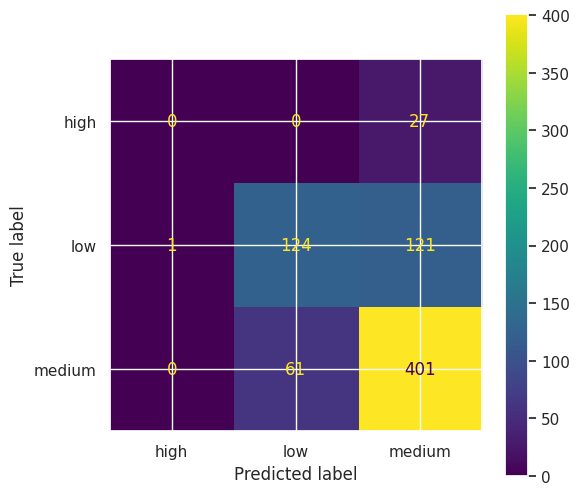

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm_2,
                              display_labels= ['high', 'low', 'medium'])  #target_names = le.classes_ or modelLR.classes_
disp.plot()

In [ ]:
# For Multiclass MultiLabel Cases, it would make sense to plot the confusion matrix per class
from sklearn.metrics import multilabel_confusion_matrix
cm = multilabel_confusion_matrix(y_test, y_pred, samplewise = False)
#samplewise = True  #calculates confusion matrix per sample, not per class
cm

array([[[707,   1],
        [ 27,   0]],

       [[428,  61],
        [122, 124]],

       [[125, 148],
        [ 61, 401]]])

In [ ]:
y_pred_prob

array([[0.00214583, 0.7110311 , 0.28682306],
       [0.03426127, 0.15618816, 0.80955057],
       [0.09502338, 0.07943699, 0.82553963],
       ...,
       [0.00111792, 0.82832216, 0.17055992],
       [0.01627489, 0.42208722, 0.56163789],
       [0.0198376 , 0.27331001, 0.7068524 ]])

In [ ]:
y_pred_class = y_pred_prob.round()

In [ ]:
y_pred_class

In [ ]:
# Create a MultiLabelBinarizer instance to transofrm our target y_test into a one hot encoded target variable
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
y_test_enc = mlb.fit_transform([[label] for label in y_test])


In [ ]:
y_test_enc[0:2]

array([[0, 1, 0],
       [0, 0, 1]])

In [ ]:
y_pred_class[0:2]

array([[0., 1., 0.],
       [0., 0., 1.]])

In [ ]:
#np.unique(y_test, return_counts=True)

(array([0, 1, 2]), array([ 27, 246, 462]))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_enc, y_pred_class, target_names = ['high', 'low', 'medium']))

              precision    recall  f1-score   support

        high       0.00      0.00      0.00        27
         low       0.67      0.50      0.57       246
      medium       0.73      0.87      0.79       462

   micro avg       0.72      0.71      0.71       735
   macro avg       0.47      0.46      0.46       735
weighted avg       0.69      0.71      0.69       735
 samples avg       0.71      0.71      0.71       735



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import multilabel_confusion_matrix
cm = multilabel_confusion_matrix(y_test_enc, y_pred_class, samplewise = False)
#samplewise = True  #calculates confusion matrix per sample, not per class
#samplewise is True, each row of the confusion matrix represents a different sample or data point, and each column represents the predicted classes or labels for that sample.
cm

array([[[707,   1],
        [ 27,   0]],

       [[429,  60],
        [123, 123]],

       [[127, 146],
        [ 62, 400]]])

In [ ]:
# accuracy for each class
for i in cm:
  print(i.diagonal().sum()/i.sum())

0.9619047619047619
0.7510204081632653
0.7156462585034014


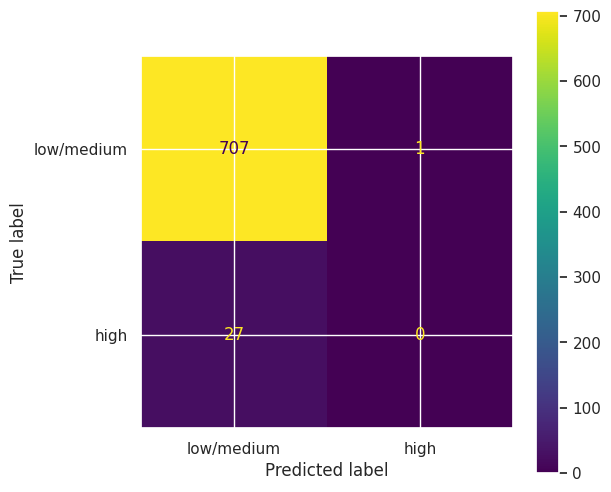

In [ ]:
# Confusion Matrix fpr class label 0 = high
#cm[0,:] #for class label 0 = high
disp = ConfusionMatrixDisplay(confusion_matrix=cm[0,:],
                              display_labels= ['low/medium', 'high'])
disp.plot()

## Quality Metrics
### True/False Positives-based Metrics

Different combinations of true/false positives/negatives lead to other quality metrics. Among the most frequently used are **precision, recall and F1**.

$$PREC = \frac{TP}{TP + FP}$$

$$REC = \frac{TP}{P}$$

The **F1** metric is the _harmonic mean_ of precision and recall:

$$F1 = 2 \cdot \frac{PREC \cdot REC}{PREC + REC}$$

### **Averaging strategies**

- `micro`: Calculate metrics globally by counting the total true positives, false negatives and false positives of all labels.
- `macro`: Calculate metrics such as Precision for each label, and find their unweighted mean.  
- `weighted`: Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label). This alters ‘macro’ to account for label imbalance; it can result in an F-score that is not between precision and recall.
- `samples`: Calculate metrics for each instance, and find their average

A macro-average will compute the metric independently for each class and then take the average (hence treating all classes equally), while weighted average will weigh the class metrics by their support. Whereas a micro-average will aggregate the contributions of all classes to compute the average metric.
 Nice example: https://datascience.stackexchange.com/questions/15989/micro-average-vs-macro-average-performance-in-a-multiclass-classification-settin


In [ ]:
# Reminder: Confusion Matrix

#                           predicted class
#                            0          1
#
#                   0       TN          FP
#   true class
#                   1       FN          TP

In [ ]:
cm

array([[[707,   1],
        [ 27,   0]],

       [[429,  60],
        [123, 123]],

       [[127, 146],
        [ 62, 400]]])

In [ ]:
#[:, 1] selects all rows in the matrix (across all samples) and the second column (index 1). This corresponds to the False Positives (FP) for each label.
cm[:, 1, 1] #[:, 1] again selects all rows in the matrix and the second column, which corresponds to the True Positives (TP) for each label

array([  0, 123, 400])

In [ ]:
def precision_micro(cm):
    # Calculate true positives (TP) and false positives (FP) for each label
    TP = cm[:, 1, 1] #cm[:, 1, 1] returns an array containing the True Positives (TP) for each label in the multilabel confusion matrix. These values represent the number of correctly predicted instances for each label across all samples.
    FP = cm[:, 0, 1] # same for False Positives

    # Calculate micro-averaged precision
    precision_micro = np.sum(TP) / (np.sum(TP) + np.sum(FP))

    return precision_micro

In [ ]:
precision_micro(cm)

0.7164383561643836

In [ ]:
#Alternatively from sklearn
from sklearn.metrics import precision_score
precision_score(y_test, y_pred, average='micro')


0.7142857142857143

In [ ]:
cm[:, 1, 1] / (cm[:, 0, 1] + cm[:, 1, 1])

array([0.        , 0.67213115, 0.73260073])

In [ ]:
def precision_macro(cm):
    # Calculate precision for each label
    precision_per_label = cm[:, 1, 1] / (cm[:, 0, 1] + cm[:, 1, 1])

    # Calculate macro-averaged precision
    precision_macro = np.mean(precision_per_label)

    return precision_macro



In [ ]:
precision_macro(cm)


0.4682439600472387

In [ ]:
precision_score(y_test, y_pred, average='macro')


0.46689640460132265

In [ ]:
def precision_weighted(confusion_matrix):
    # Calculate precision for each label
    precision_per_label = cm[:, 1, 1] / (cm[:, 0, 1] + cm[:, 1, 1])

    # Calculate the number of true instances for each label = support for each label
    true_instances_per_label = np.sum(cm[:, 1, :], axis=1)

    # Calculate weighted precision = (support label1 * precicion label 1 + support label 2 * precision label2 + support label3 * precision label3) / total number test set
    precision_weighted = np.sum(precision_per_label * true_instances_per_label) / np.sum(true_instances_per_label)

    return precision_weighted

In [ ]:
precision_weighted(cm)

0.6854500690566264

###F1 Score

In [ ]:
f1_score(y_test, y_pred, average="micro")

0.7142857142857143

In [ ]:
f1_score(y_test, y_pred, average = "macro")

0.4562266728783077

In [ ]:
f1_score(y_test, y_pred, average="weighted")

0.6912142389021675